In [1]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching para_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s para_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


Output saved by overwring previous file at animations/parametrization/parametrization.mp4.


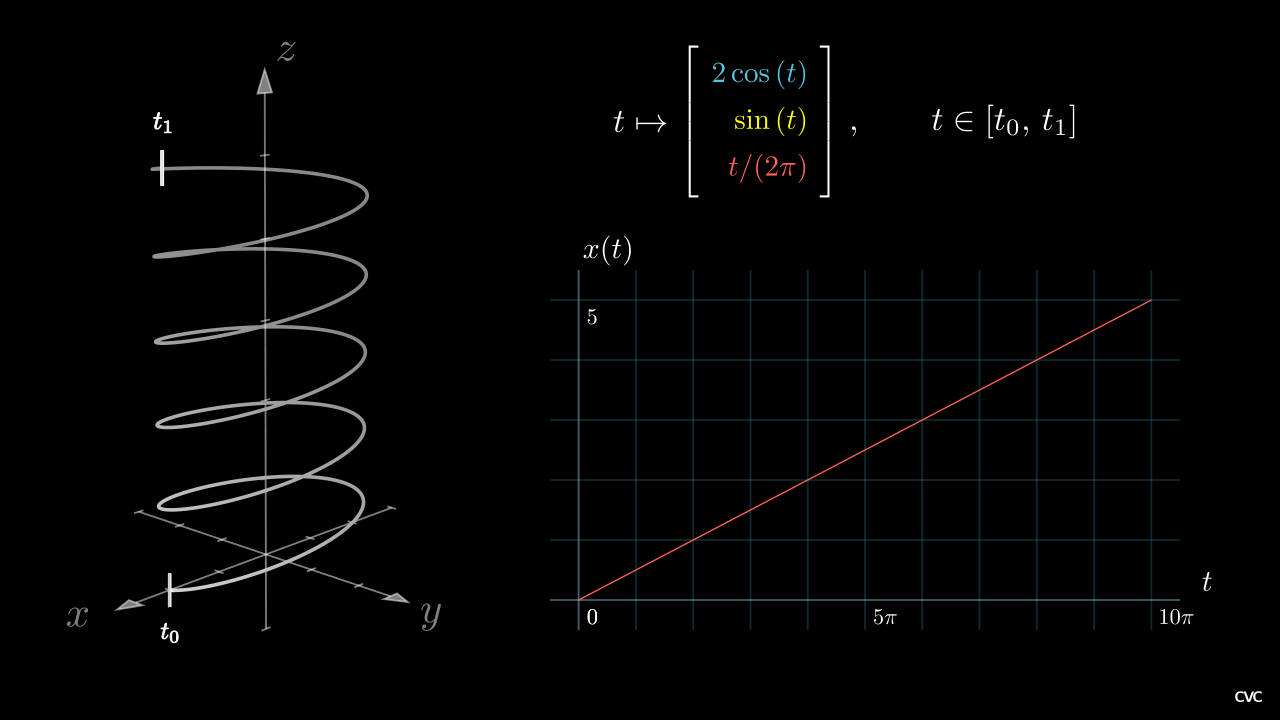

In [165]:
%%capture_video --path "animations/parametrization/parametrization.mp4"
%%manim -qm --fps 60 $video_scene

class para_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

         # Headline
        text_parametrization = Tex(r"Parametrization of a Trajectory in $\mathbb{R}^3$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)

        text_para_left = MathTex(r"t\mapsto", font_size = 36).move_to([0, 2.65, 0])
        text_para_right = Matrix([[r'x(t)'], [r'y(t)'], [r'z(t)']]).scale(0.65).next_to(text_para_left, RIGHT)
        text_para_right_x = Matrix([[r'2\cos{(t)}'], [r'y(t)'], [r'z(t)']]).scale(0.65).next_to(text_para_left, RIGHT)
        text_para_right_y = Matrix([[r'2\cos{(t)}'], [r'\sin{(t)}'], [r'z(t)']]).scale(0.65).next_to(text_para_left, RIGHT)
        text_para_right_z = Matrix([[r'2\cos{(t)}'], [r'\sin{(t)}'], [r't/(2\pi)']]).scale(0.65).next_to(text_para_left, RIGHT)
        text_para_right[0][0].set_color(BLUE)
        text_para_right[0][1].set_color(YELLOW)
        text_para_right[0][2].set_color(RED)
        text_para_right_x[0][0].set_color(BLUE)
        text_para_right_x[0][1].set_color(YELLOW)
        text_para_right_x[0][2].set_color(RED)
        text_para_right_y[0][0].set_color(BLUE)
        text_para_right_y[0][1].set_color(YELLOW)
        text_para_right_y[0][2].set_color(RED)
        text_para_right_z[0][0].set_color(BLUE)
        text_para_right_z[0][1].set_color(YELLOW)
        text_para_right_z[0][2].set_color(RED)
        text_para_def =  MathTex(r",\qquad t\in\left[t_0,\,t_1\right]", font_size = 36).next_to(text_para_right_z, RIGHT)
        mapping_group = VGroup(text_para_left, text_para_right, text_para_def)


        # 3D-Coordinate System
        CO3D = [-6, 0, -8]
        CO3D_x_range = (-3, 3, 1)
        CO3D_y_range = (-3, 3, 1)
        CO3D_z_range = (-1, 6, 1)
        ax = ThreeDAxes(
            x_range = CO3D_x_range, y_range = CO3D_y_range, z_range = CO3D_z_range,
            x_length = 6, y_length = 6, z_length = 9, axis_config = {'tip_length': 0.05, 'tip_width': 0.3}, 
            z_axis_config = {'color': WHITE},
            ).move_to(CO3D).rotate(
                axis = [1, 0, 0], angle = 6*PI/4
                ).rotate(
                    axis = [0, 1, 0], angle = 5*PI/4
                    ).rotate(axis = [1, 0, 0], angle = PI/12).rotate(
                        axis = [0, 1, 0], angle = PI/16
                        )
        x_lab = Tex('$x$', font_size = 64).move_to(CO3D).shift(4*DOWN + 2.75*LEFT)
        y_lab = Tex('$y$', font_size = 64).move_to(CO3D).shift(4*DOWN + 2.75*RIGHT)
        z_lab = Tex('$z$', font_size = 64).move_to(CO3D + 0.5*RIGHT).shift(4.8*UP)
        ax_3D = VGroup(ax, x_lab, y_lab, z_lab).set_opacity(0.5)


        # components of the parametric function
        def x_func(t):
            return 2 * np.cos(t)

        def y_func(t):
            return 1 * np.sin(t)
            
        def z_func(t):
            return t / 2 / PI


        # parametric function specified to ax
        def para_ax_func(t):
            return ax.c2p(x_func(t), y_func(t), z_func(t))

        # generates t_line
        def t_line(t, color):
            return Line3D(para_ax_func(t) + np.array([0, 0.25, 0]), para_ax_func(t) + np.array([0, -0.25, 0]), color = color)

        # generates connector
        def r_connector(start, end, color = RED):
            return Line(start, end, color = color, stroke_width = 4)


        # function start and end
        t0 = 0
        t1 = 10 * PI
        t_bar = 6.75 * PI
        para_curve = ParametricFunction(para_ax_func, color = GREY, t_range = np.array([t0, t1, 0.01])).set_shade_in_3d(True)
        t0_line = t_line(t0, WHITE)
        t1_line = t_line(t1, WHITE)
        t0_label = MathTex(r't_0', font_size = 36, stroke_width = 1, color = WHITE).next_to(t0_line, DOWN)
        t1_label = MathTex(r't_1', font_size = 36, stroke_width = 1, color = WHITE).next_to(t1_line, UP)


        # 3D sphere and connectors
        r_sphere = Sphere(center = para_ax_func(t_bar), radius = 0.1, resolution = (10, 10))
        r_sphere.set_color(WHITE)
        x = x_func(t_bar)
        y = y_func(t_bar)
        z = z_func(t_bar)
        x_line = r_connector(ax.c2p(0, y, 0), ax.c2p(x, y, 0), color = BLUE)
        y_line = r_connector(ax.c2p(x, 0, 0), ax.c2p(x, y, 0), color = YELLOW)
        z_line = r_connector(ax.c2p(x, y, z), ax.c2p(x, y, 0), color = RED)


        # 2D-Coordinate Sytem for each coordinate
        origin = [2.5, -1, 0]
        x_length = 7
        y_length = 4
        x_range = [-0.5, 10.5, 1]
        x_dict = dict(zip([0, 5, 10], [0, r"$5\pi$", r"$10\pi$"]))

        # x(t) system
        y_range_x = [-2.5, 2.5, 1]                          
        y_dict_x = dict(zip([-2, 0, 2], [-2, 0, 2]))
        npla_x = NumberPlane(
            x_range = x_range, y_range = y_range_x, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin).add_coordinates(x_dict, y_dict_x)#.set_color(BLUE)
        npla_xlabel_x = npla_x.get_x_axis_label(Tex(r"$t$", font_size = 32))
        npla_ylabel_x = npla_x.get_y_axis_label(Tex(r"$x(t)$", font_size = 32)).shift(0.25 * LEFT)
        npla_x_group = VGroup(npla_x, npla_xlabel_x, npla_ylabel_x)

        # y(t) system
        y_range_y = [-1.25, 1.25, 1]                          
        y_dict_y = dict(zip([-1, 0, 1], [-1, 0, 1]))
        npla_y = NumberPlane(
            x_range = x_range, y_range = y_range_y, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin).add_coordinates(x_dict, y_dict_y)
        npla_xlabel_y = npla_y.get_x_axis_label(Tex(r"$t$", font_size = 32))
        npla_ylabel_y = npla_y.get_y_axis_label(Tex(r"$x(t)$", font_size = 32)).shift(0.25 * LEFT)
        npla_y_group = VGroup(npla_y, npla_xlabel_y, npla_ylabel_y)

        # z(t) system
        y_range_z = [-0.5, 5.5, 1]                          
        y_dict_z = dict(zip([0, 5], [0, 5]))
        npla_z = NumberPlane(
            x_range = x_range, y_range = y_range_z, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin).add_coordinates(x_dict, y_dict_z)
        npla_xlabel_z = npla_z.get_x_axis_label(Tex(r"$t$", font_size = 32))
        npla_ylabel_z = npla_z.get_y_axis_label(Tex(r"$x(t)$", font_size = 32)).shift(0.25 * LEFT)
        npla_z_group = VGroup(npla_z, npla_xlabel_z, npla_ylabel_z)


        # 2D-functions plus their updaters
        x_func = npla_x.plot(lambda t: x_func(t * PI), color = BLUE, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 10])
        y_func = npla_y.plot(lambda t: y_func(t * PI), color = YELLOW, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 10])
        z_func = npla_z.plot(lambda t: z_func(t * PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 10])

        def x_func_updater(func):
            t = t_tracker.get_value()
            func.become(npla_x.plot(lambda t_var: x_func(t_var * PI), color = BLUE, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, t / PI]))

        def y_func_updater(func):
            t = t_tracker.get_value()
            func.become(npla_y.plot(lambda t_var: y_func(t_var * PI), color = BLUE, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, t / PI]))

        def z_func_updater(func):
            t = t_tracker.get_value()
            func.become(npla_z.plot(lambda t_var: z_func(t_var * PI), color = BLUE, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, t / PI]))


        # updates spehere and connectors
        def r_updater(sphere):
            t = t_tracker.get_value()
            x = x_func(t)
            y = y_func(t)
            z = z_func(t)
            x_line.become(r_connector(ax.c2p(0, y, 0), ax.c2p(x, y, 0), color = BLUE))
            y_line.become(r_connector(ax.c2p(x, 0, 0), ax.c2p(x, y, 0), color = YELLOW))
            z_line.become(r_connector(ax.c2p(x, y, z), ax.c2p(x, y, 0), color = RED))
            sphere.move_to(para_ax_func(t))


        #self.add(text_parametrization)
        self.add(text_para_left, text_para_right_z, text_para_def)
        self.add(ax_3D)
        self.add(para_curve)

        self.add(t0_line, t1_line)
        self.add(t0_label, t1_label)
        # self.add(npla_x_group, x_func)
        # self.add(npla_y_group, y_func)
        self.add(npla_z_group, z_func)

        # self.play(FadeIn(x_line), FadeIn(y_line), FadeIn(z_line), FadeIn(r_sphere), run_time = 1.5)

        # self.wait(0.5)
        # # t_tracker = ValueTracker(t0)
        # # r_sphere.add_updater(r_updater)
        # # self.play(t_tracker.animate.set_value(t1), rate_func = linear, run_time = 15)
        # self.wait(3)

[0:00] Today we are going to parametrize a threedimensional curve.

Our curve is the grey spiral on the left side of the screen, we are now trying to describe it mathematically.

First, we introduce a scalar variable tee, taking one value teezero at the start of the spiral and the value teeone at its end.

For each value of tee between teezero and teeone, we want to receive a specific point on the curve. Namely one indivial value for each coordinate, ex, why, and zet, each depending on tee.

Finding this function, mapping from the scalar variable tee to the threedimensional space, is the essence of parametrization.

We will now look at each spatial coordinate individually while letting tee run from teezero to teeone. 

teezero to teeone